# Problem Statement :

You are working for a new-age insurance company and employ mutiple outreach plans to sell term insurance to your customers. Telephonic marketing campaigns still remain one of the most effective way to reach out to people however they incur a lot of cost. Hence, it is important to identify the customers that are most likely to convert beforehand so that they can be specifically targeted via call. We are given the historical marketing data of the insurance company and are required to build a ML model that will predict if a client will subscribe to the insurance. 


# Variables in the Dataset :

# Importing Required Libraries :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  
     

# Read the dataset

In [2]:
df = pd.read_csv(r'C:\\Users\\NEW\\Downloads\\tmctrain.csv')
pd.set_option('display.max_columns',None)
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [3]:
df.shape # 45211 rows 
         # 11 columns

(45211, 11)

In [4]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [6]:
#checking the target var.
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
#Finding the percentage of the data
print('Percentage of "no": ',((39916) / (39916+5289)) * 100 )
print('Percentage of "yes": ',((5289) / (39916+5289)) * 100 )

Percentage of "no":  88.29996681782988
Percentage of "yes":  11.700033182170113


Hence, the data is IMBALANCED...

# DATA Cleaning...

In [8]:
#checking null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [9]:
#find duplicate data
df.duplicated().sum()

6

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

#  Check the type of data to ensure it is correct.



In [11]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [12]:
df['age'].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64)

In [13]:
df['job'].unique()


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [14]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [15]:
df['education_qual'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [16]:
df['call_type'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [17]:
df['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [18]:
df['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [19]:
df['dur'].unique()

array([ 261,  151,   76, ..., 1298, 1246, 1556], dtype=int64)

In [20]:
df['num_calls'].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

In [21]:
df['prev_outcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [22]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [23]:
#Adding a new column named as target
df['target'] = df["y"].map({"yes":1 , "no": 0})
df['target']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: target, Length: 45205, dtype: int64

# Replace the un-known values

In [24]:
#convert the categorical column into the numerical column

In [25]:
# AGE:
df.age.value_counts()


32    2084
31    1996
33    1972
34    1929
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [26]:
# Let’s see how many people are insured, respective to their age.
df.groupby('age')['target'].mean()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
        ...   
90    1.000000
92    1.000000
93    1.000000
94    0.000000
95    0.500000
Name: target, Length: 77, dtype: float64

In [27]:
# JOB
df.job.value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [28]:
# Let’s see how many people are insured, respective to their job.
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.072765
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
unknown          0.118056
Name: target, dtype: float64

In [29]:
# Marital Status
df.marital.value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [30]:
# Let’s see how many people are insured, respective to the Marital status.
df.groupby('marital')['target'].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: target, dtype: float64

In [31]:
# Educational Qualification
df.education_qual.value_counts()


secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

In [32]:
# Let’s see how many people are insured, respective to the education qualification.
df.groupby('education_qual')['target'].mean()


education_qual
primary      0.086277
secondary    0.105608
tertiary     0.150086
unknown      0.135703
Name: target, dtype: float64

In [33]:
df.education_qual.isnull().sum()


0

In [34]:
#Call Type
df.call_type.value_counts()


cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

In [35]:
# Let’s see how many people are insured, respective to the call type.

df.groupby('call_type')['target'].mean()


call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

In [36]:
# DAY
df.day.value_counts()


20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [37]:
# Let’s see how many people are insured, respective to the Day.

df.groupby('day')['target'].mean()


day
1     0.279503
2     0.140867
3     0.164968
4     0.159170
5     0.112565
6     0.093685
7     0.086406
8     0.109239
9     0.114744
10    0.230916
11    0.122380
12    0.152215
13    0.152050
14    0.113636
15    0.139753
16    0.135689
17    0.090768
18    0.098787
19    0.069476
20    0.069767
21    0.099210
22    0.170166
23    0.134185
24    0.138702
25    0.158333
26    0.112077
27    0.133809
28    0.078185
29    0.073926
30    0.173052
31    0.071540
Name: target, dtype: float64

In [38]:
# month
df.mon.value_counts()


may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [39]:
# Let’s see how many people are insured, respective to the month.

df.groupby('mon')['target'].mean()


mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: target, dtype: float64

In [40]:
# DURATION
df.dur.value_counts()


124     187
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [41]:
# Let’s see how many people are insured, respective to the duration of a call.

df.groupby('dur')['target'].mean()


dur
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3366    0.0
3422    0.0
3785    0.0
3881    1.0
4918    0.0
Name: target, Length: 1573, dtype: float64

In [42]:
# Number of Calls
df.num_calls.value_counts()


1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [43]:
# Let’s see how many people are insured, respective to the number of call.
df.groupby('num_calls')['target'].mean()


num_calls
1     0.145992
2     0.112053
3     0.111936
4     0.090057
5     0.078798
6     0.071263
7     0.063946
8     0.059259
9     0.064220
10    0.052632
11    0.079602
12    0.025806
13    0.045113
14    0.043011
15    0.047619
16    0.025316
17    0.086957
18    0.000000
19    0.000000
20    0.023256
21    0.028571
22    0.000000
23    0.000000
24    0.050000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.062500
30    0.000000
31    0.000000
32    0.111111
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
41    0.000000
43    0.000000
44    0.000000
46    0.000000
50    0.000000
51    0.000000
55    0.000000
58    0.000000
63    0.000000
Name: target, dtype: float64

In [44]:
# Previous Outcome
df.prev_outcome.value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [45]:
# Let’s see how many people are insured, respective to the previous outcome.
df.groupby('prev_outcome')['target'].mean()


prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [46]:
#desired target:
df.y.value_counts()


no     39916
yes     5289
Name: y, dtype: int64

In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
 11  target          45205 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


# finding outliers

In [48]:
print(df.columns)

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')


here age, day, dur(duration), num_calls(no.of calls) columns are continous numerical datas. so there is possible to find the ouliers

<AxesSubplot:xlabel='age'>

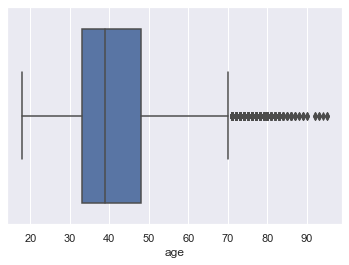

In [49]:
# 1. age (to find outlier)
sns.set(style="darkgrid")
sns.boxplot(x=df['age'])

In [50]:
#outlier found in "age" column, so we gonna remove that outlier by  using IQR 
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 70.5 Lower bound : 10.5


The clip() function in pandas is used to limit the values in an array or series between two values. In this case, df.age = df.age.clip(10.5,70.5) will limit the ‘age’ column in the dataframe df to be between 10.5 and 70.5.

Here’s what it does:

If a value in the ‘age’ column is less than 10.5, it will be replaced with 10.5.
If a value in the ‘age’ column is greater than 70.5, it will be replaced with 70.5.
All other values that are between 10.5 and 70.5 (inclusive) will remain unchanged.

In [51]:
df.age = df.age.clip(10.5,70.5)

<AxesSubplot:xlabel='age'>

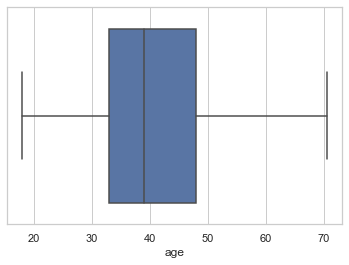

In [52]:
#check after outlier removal:
sns.set(style="whitegrid")
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='day'>

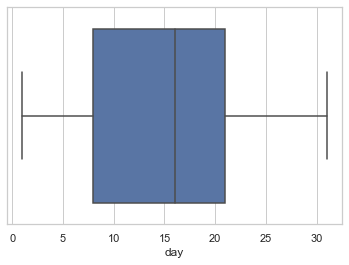

In [53]:
# 2. day (to find outlier)
sns.set(style="whitegrid")
sns.boxplot(x=df['day'])

here, there is NO outliers

<AxesSubplot:xlabel='dur'>

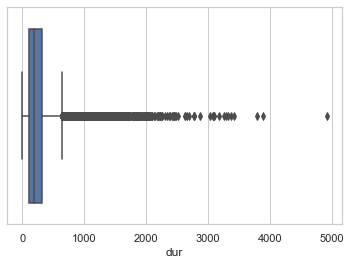

In [54]:
# 3. duration  (to find outlier)
sns.set(style="whitegrid")
sns.boxplot(df['dur'])

outlier found in "duration" column

In [55]:
#outlier found in "duration" column, so we gonna remove that outlier by  using IQR 

q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 643.0 Lower bound : -221.0


In [56]:
df.dur = df.dur.clip(-221.0,643.0)


<AxesSubplot:xlabel='dur'>

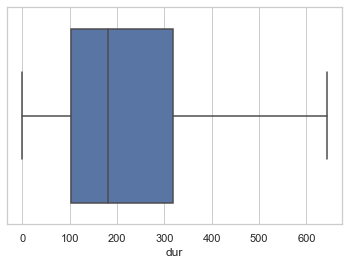

In [57]:
sns.set(style="whitegrid")
sns.boxplot(df['dur'])

<AxesSubplot:xlabel='num_calls'>

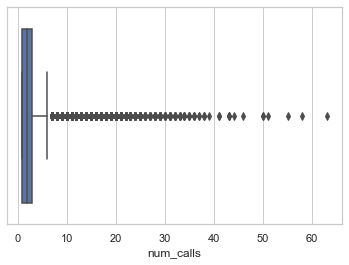

In [58]:
# 4. number of calls  (to find outlier)

sns.set(style="whitegrid")
sns.boxplot(df['num_calls'])

outlier found in "num_calls" column

In [59]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


In [60]:
df.num_calls = df.num_calls.clip(-2.0,6.0)


<AxesSubplot:xlabel='num_calls'>

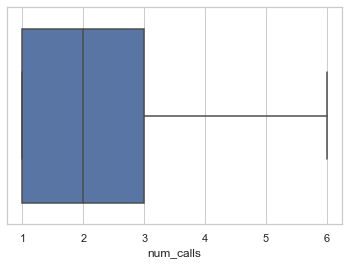

In [61]:
sns.set(style="whitegrid")
sns.boxplot(df['num_calls'])

# EDA

###  Distribution of feature and target variable

<AxesSubplot:xlabel='age', ylabel='Count'>

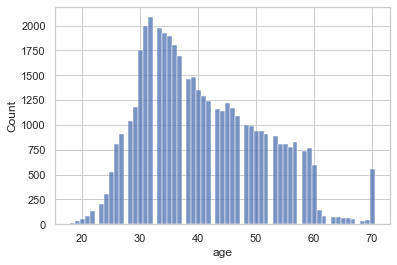

In [62]:
# Age distribution 
sns.histplot((df.age))

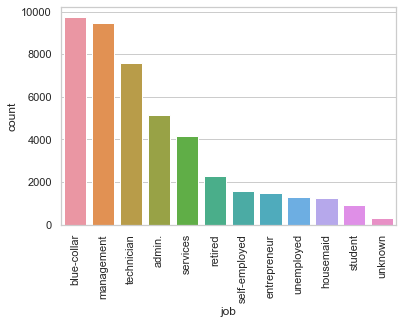

In [63]:
#Job distribution 
sns.countplot(df['job'],order=df.job.value_counts().index)
plt.xticks(rotation=90);  # This will rotate the x-axis labels


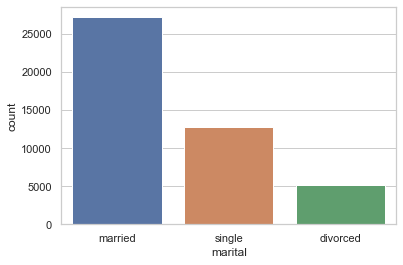

In [64]:
# Marital distribution 
sns.countplot(df['marital'],order=df.marital.value_counts().index); 


<AxesSubplot:xlabel='education_qual', ylabel='count'>

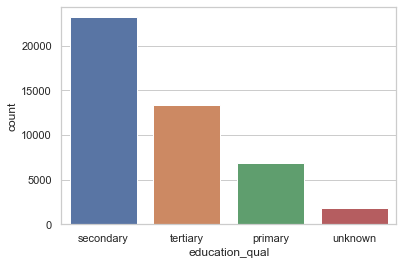

In [65]:
# Education qualification distribution 
sns.countplot(df['education_qual'],order=df.education_qual.value_counts().index) 


<AxesSubplot:xlabel='call_type', ylabel='count'>

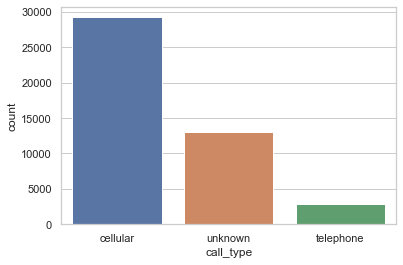

In [66]:
# Call type distribution 
sns.countplot(df['call_type'],order=df.call_type.value_counts().index) 


<AxesSubplot:xlabel='day', ylabel='Count'>

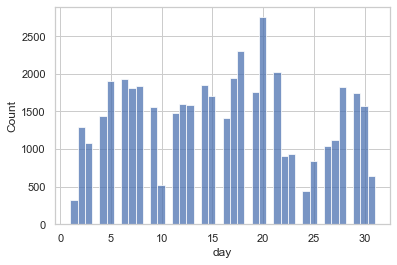

In [67]:
# Day distribution 
sns.histplot(df['day']) 


<AxesSubplot:xlabel='mon', ylabel='count'>

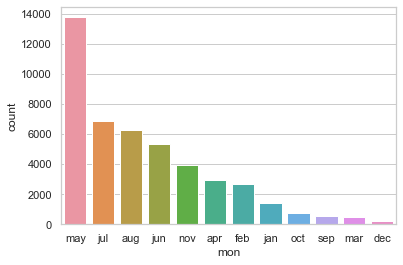

In [68]:
 # Mon distribution 
sns.countplot(df['mon'],order=df.mon.value_counts().index) 


<AxesSubplot:xlabel='dur', ylabel='Count'>

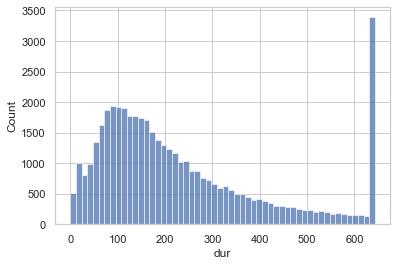

In [69]:
# Dur distribution 
sns.histplot((df.dur))

<AxesSubplot:xlabel='num_calls', ylabel='Count'>

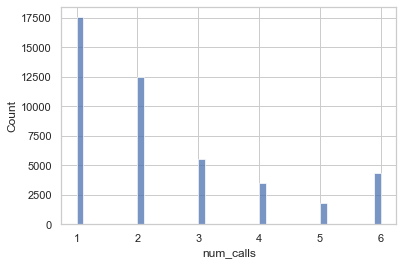

In [70]:
# Num call distribution 
sns.histplot(df['num_calls']) 


<AxesSubplot:xlabel='prev_outcome', ylabel='count'>

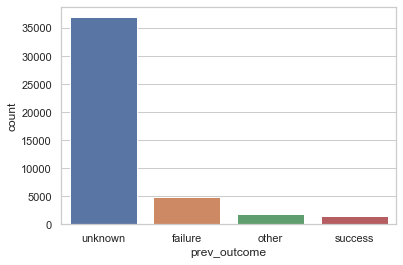

In [71]:
# Previous outcome distribution 
sns.countplot(df['prev_outcome'],order=df.prev_outcome.value_counts().index) 


<AxesSubplot:xlabel='y', ylabel='count'>

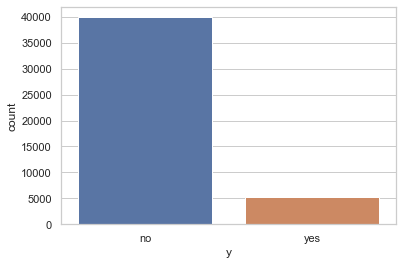

In [72]:
 # Target distribution 
sns.countplot(df['y']) 


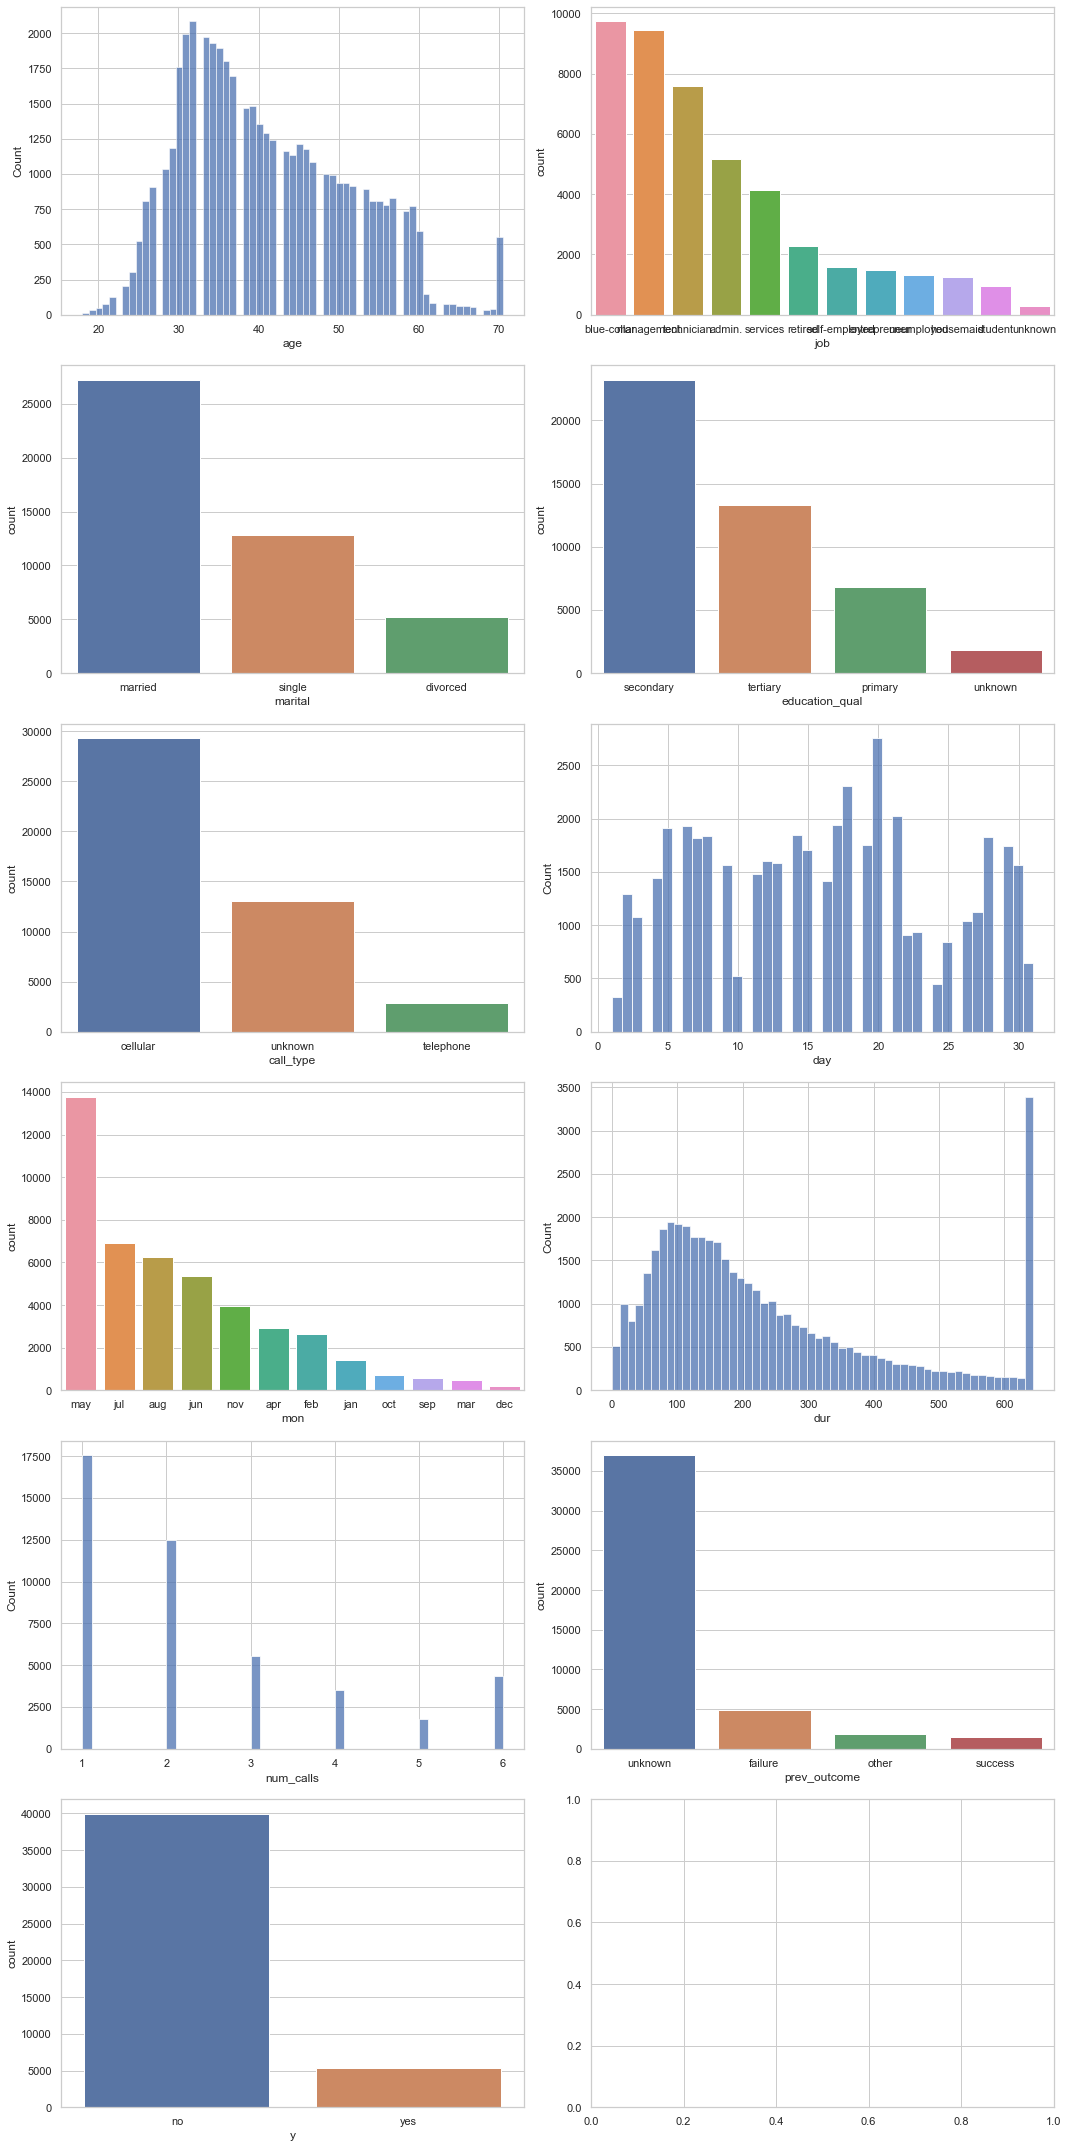

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(6, 2, figsize=(15, 30))

sns.histplot(df['age'], ax=axs[0, 0])
sns.countplot(df['job'], order=df['job'].value_counts().index, ax=axs[0, 1])
sns.countplot(df['marital'], order=df['marital'].value_counts().index, ax=axs[1, 0])
sns.countplot(df['education_qual'], order=df['education_qual'].value_counts().index, ax=axs[1, 1])
sns.countplot(df['call_type'], order=df['call_type'].value_counts().index, ax=axs[2, 0])
sns.histplot(df['day'], ax=axs[2, 1])
sns.countplot(df['mon'], order=df['mon'].value_counts().index, ax=axs[3, 0])
sns.histplot(df['dur'], ax=axs[3, 1])
sns.histplot(df['num_calls'], ax=axs[4, 0])
sns.countplot(df['prev_outcome'], order=df['prev_outcome'].value_counts().index, ax=axs[4, 1])
sns.countplot(df['y'], ax=axs[5, 0])

plt.tight_layout()
plt.show()


From the above plots we can clearly tell the following interpretation

1. Age
Most Target : 30 to 40 years
Least Target : belove 20 and above 60
2. Job
Most Target : blue-collar and management
Least Target : students and house maid
3. Marital Status
Most Target : Maried
Least Target : Divorced
4. Education
Most Target : Secondary
Least Target : Primary
5. Call Type
Most Target : cellular
Least Target : telephone
6. Day
Most Target : Mid of the month
Least Target : Beginning of Month
7. Month
Most Target : May
Least Target : December
8. Duration
Most Target : call last around 1750 second
Least Target : call last around 100 to 200 second
9. No of Calls
Most Target : most people contacted one time
Least Target : least people contacted 5 times
10. Previous Outcome
Most Target : most people previous outcome was unknown
Least Target : Previous outcome for least people are success
11. Target
No of people insured is very less percentage (ie) 88 %, only few percentage are insured.

# Features vs target

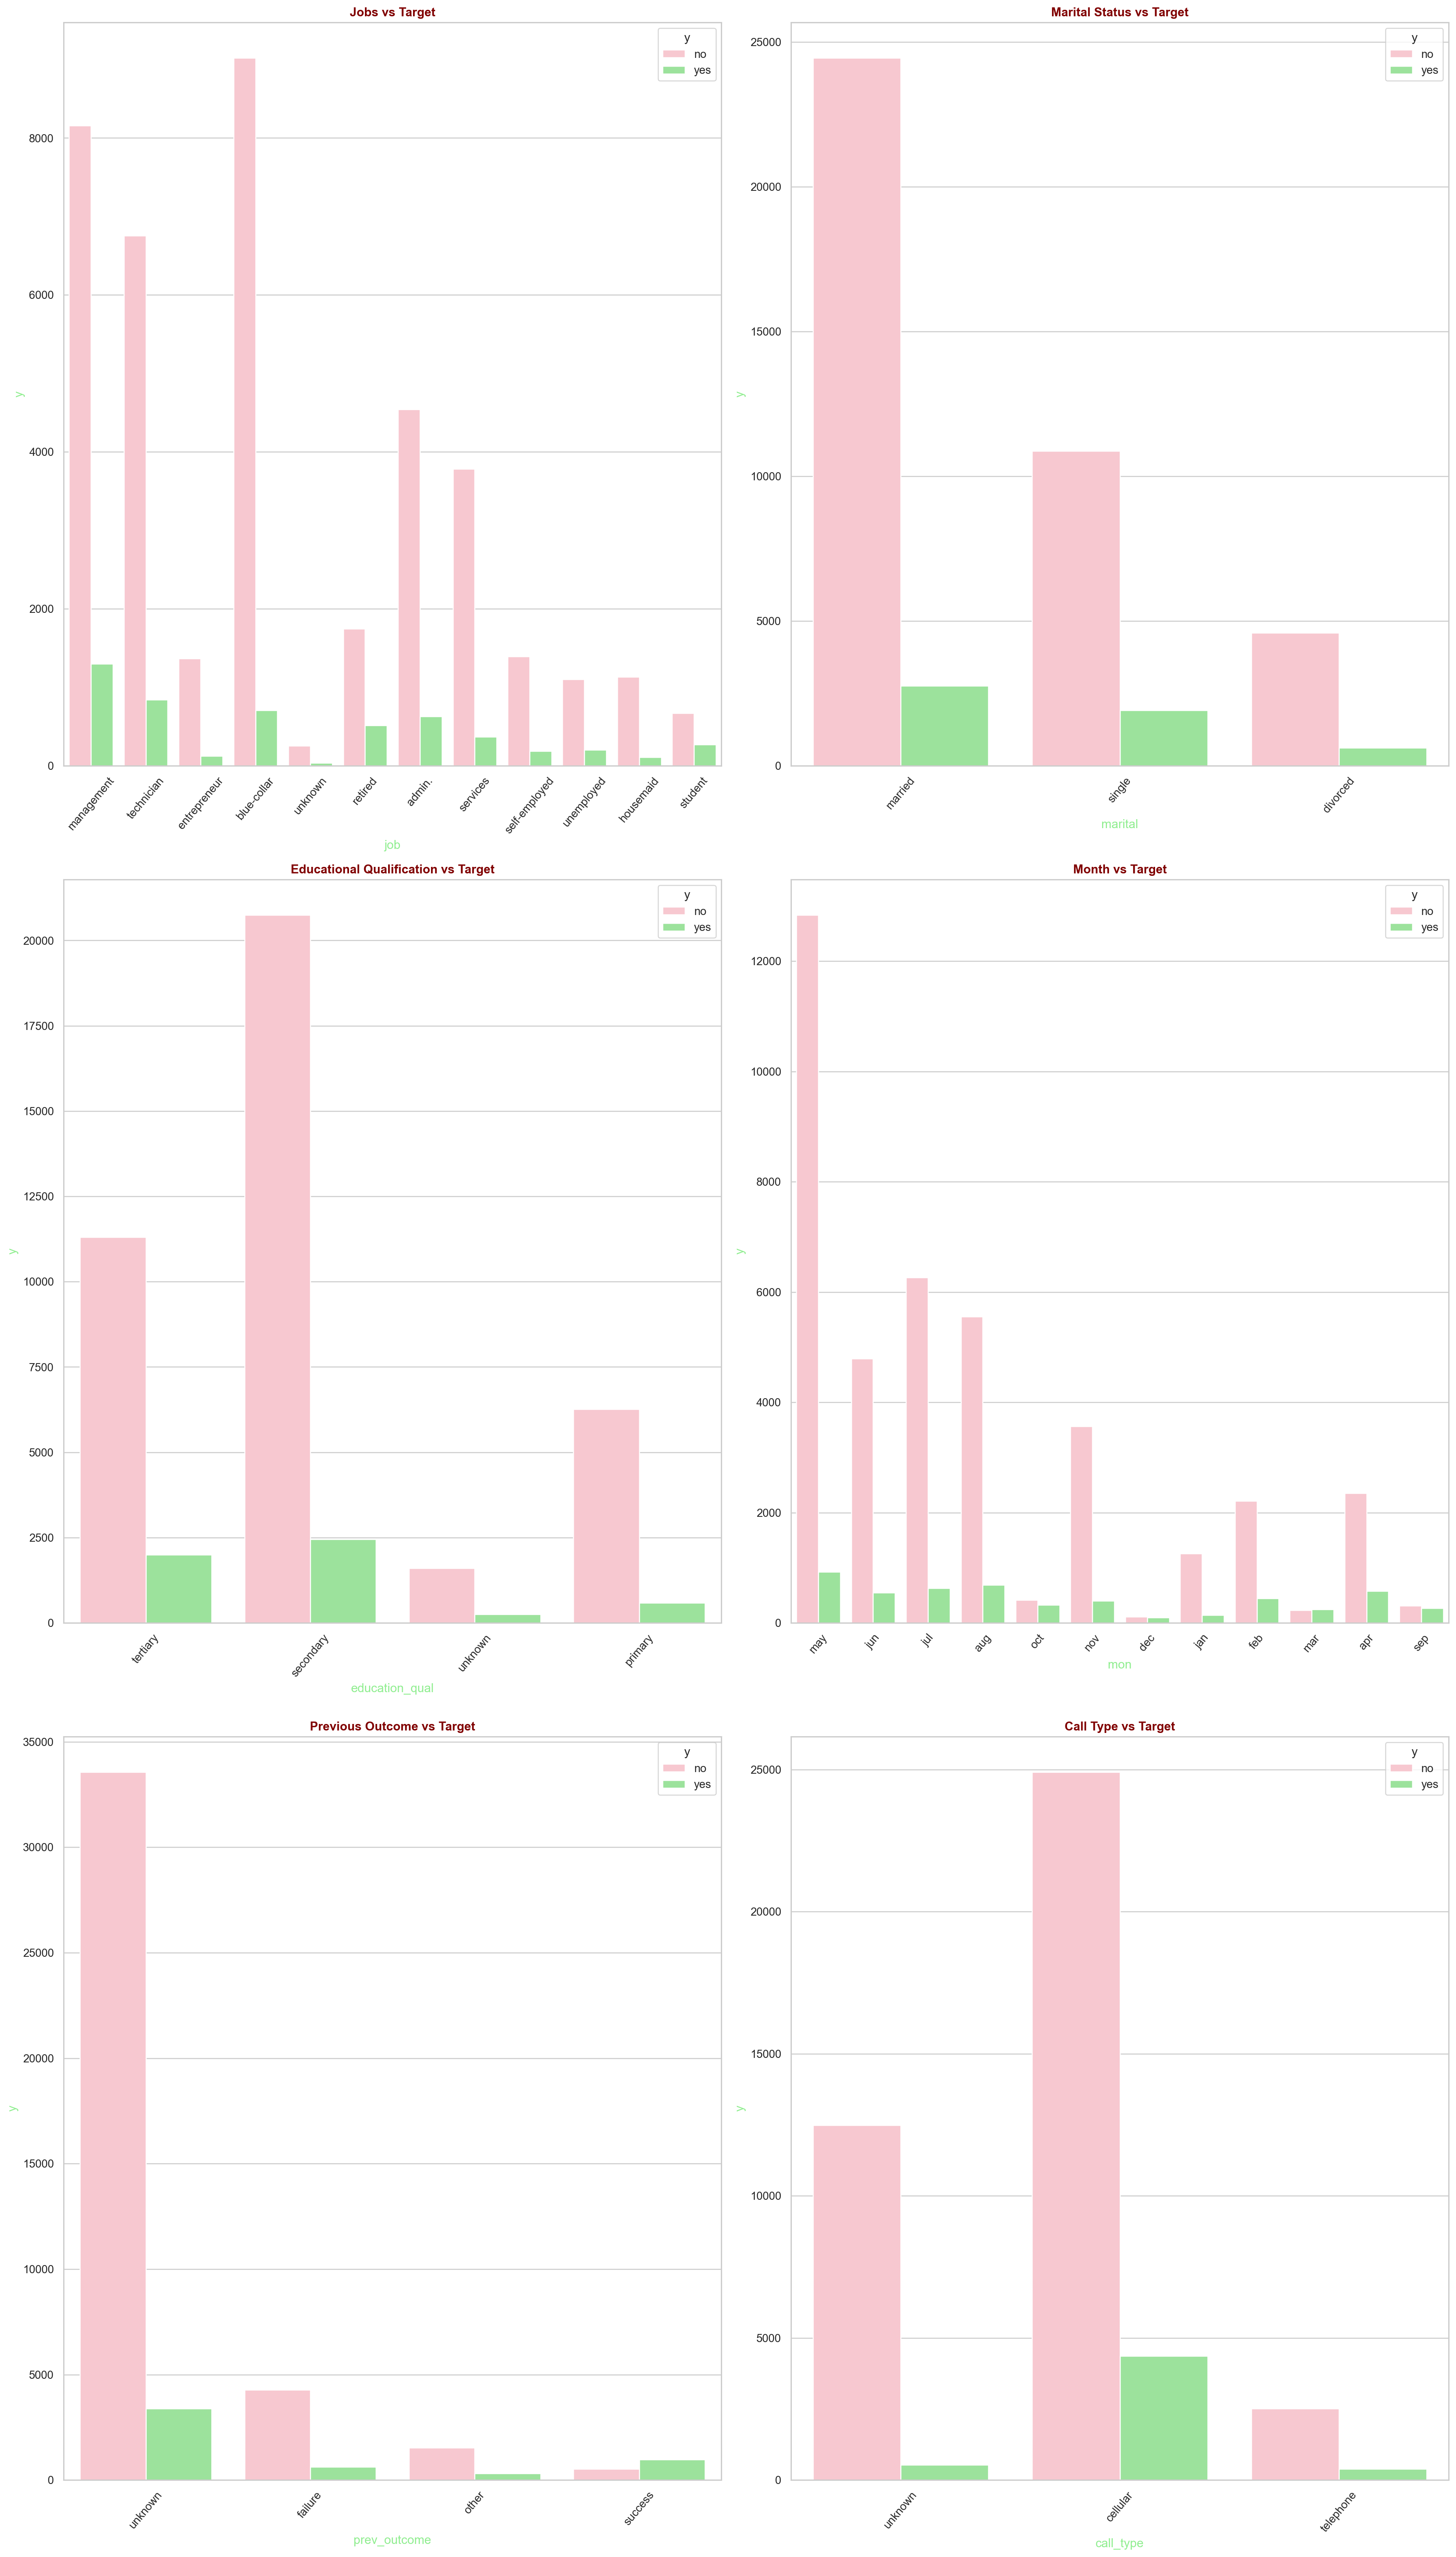

In [74]:
# Define the features and their titles
features = ['job', 'marital', 'education_qual', 'mon', 'prev_outcome', 'call_type']
titles = ['Jobs vs Target', 'Marital Status vs Target', 'Educational Qualification vs Target', 
          'Month vs Target', 'Previous Outcome vs Target', 'Call Type vs Target']

plt.figure(figsize=(20,35), dpi=180)

# Loop through the features and create a subplot for each one
for i in range(len(features)):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=features[i], hue='y', data=df, palette=['pink', 'LightGreen'])
    plt.xticks(rotation=50)
    plt.title(titles[i], fontweight='bold', color='maroon')
    plt.xlabel(features[i], color='LightGreen')
    plt.ylabel('y', color='LightGreen')

plt.tight_layout()
plt.show()


# Numerical Variable vs Target -- Age, Day, Duration, No of Calls

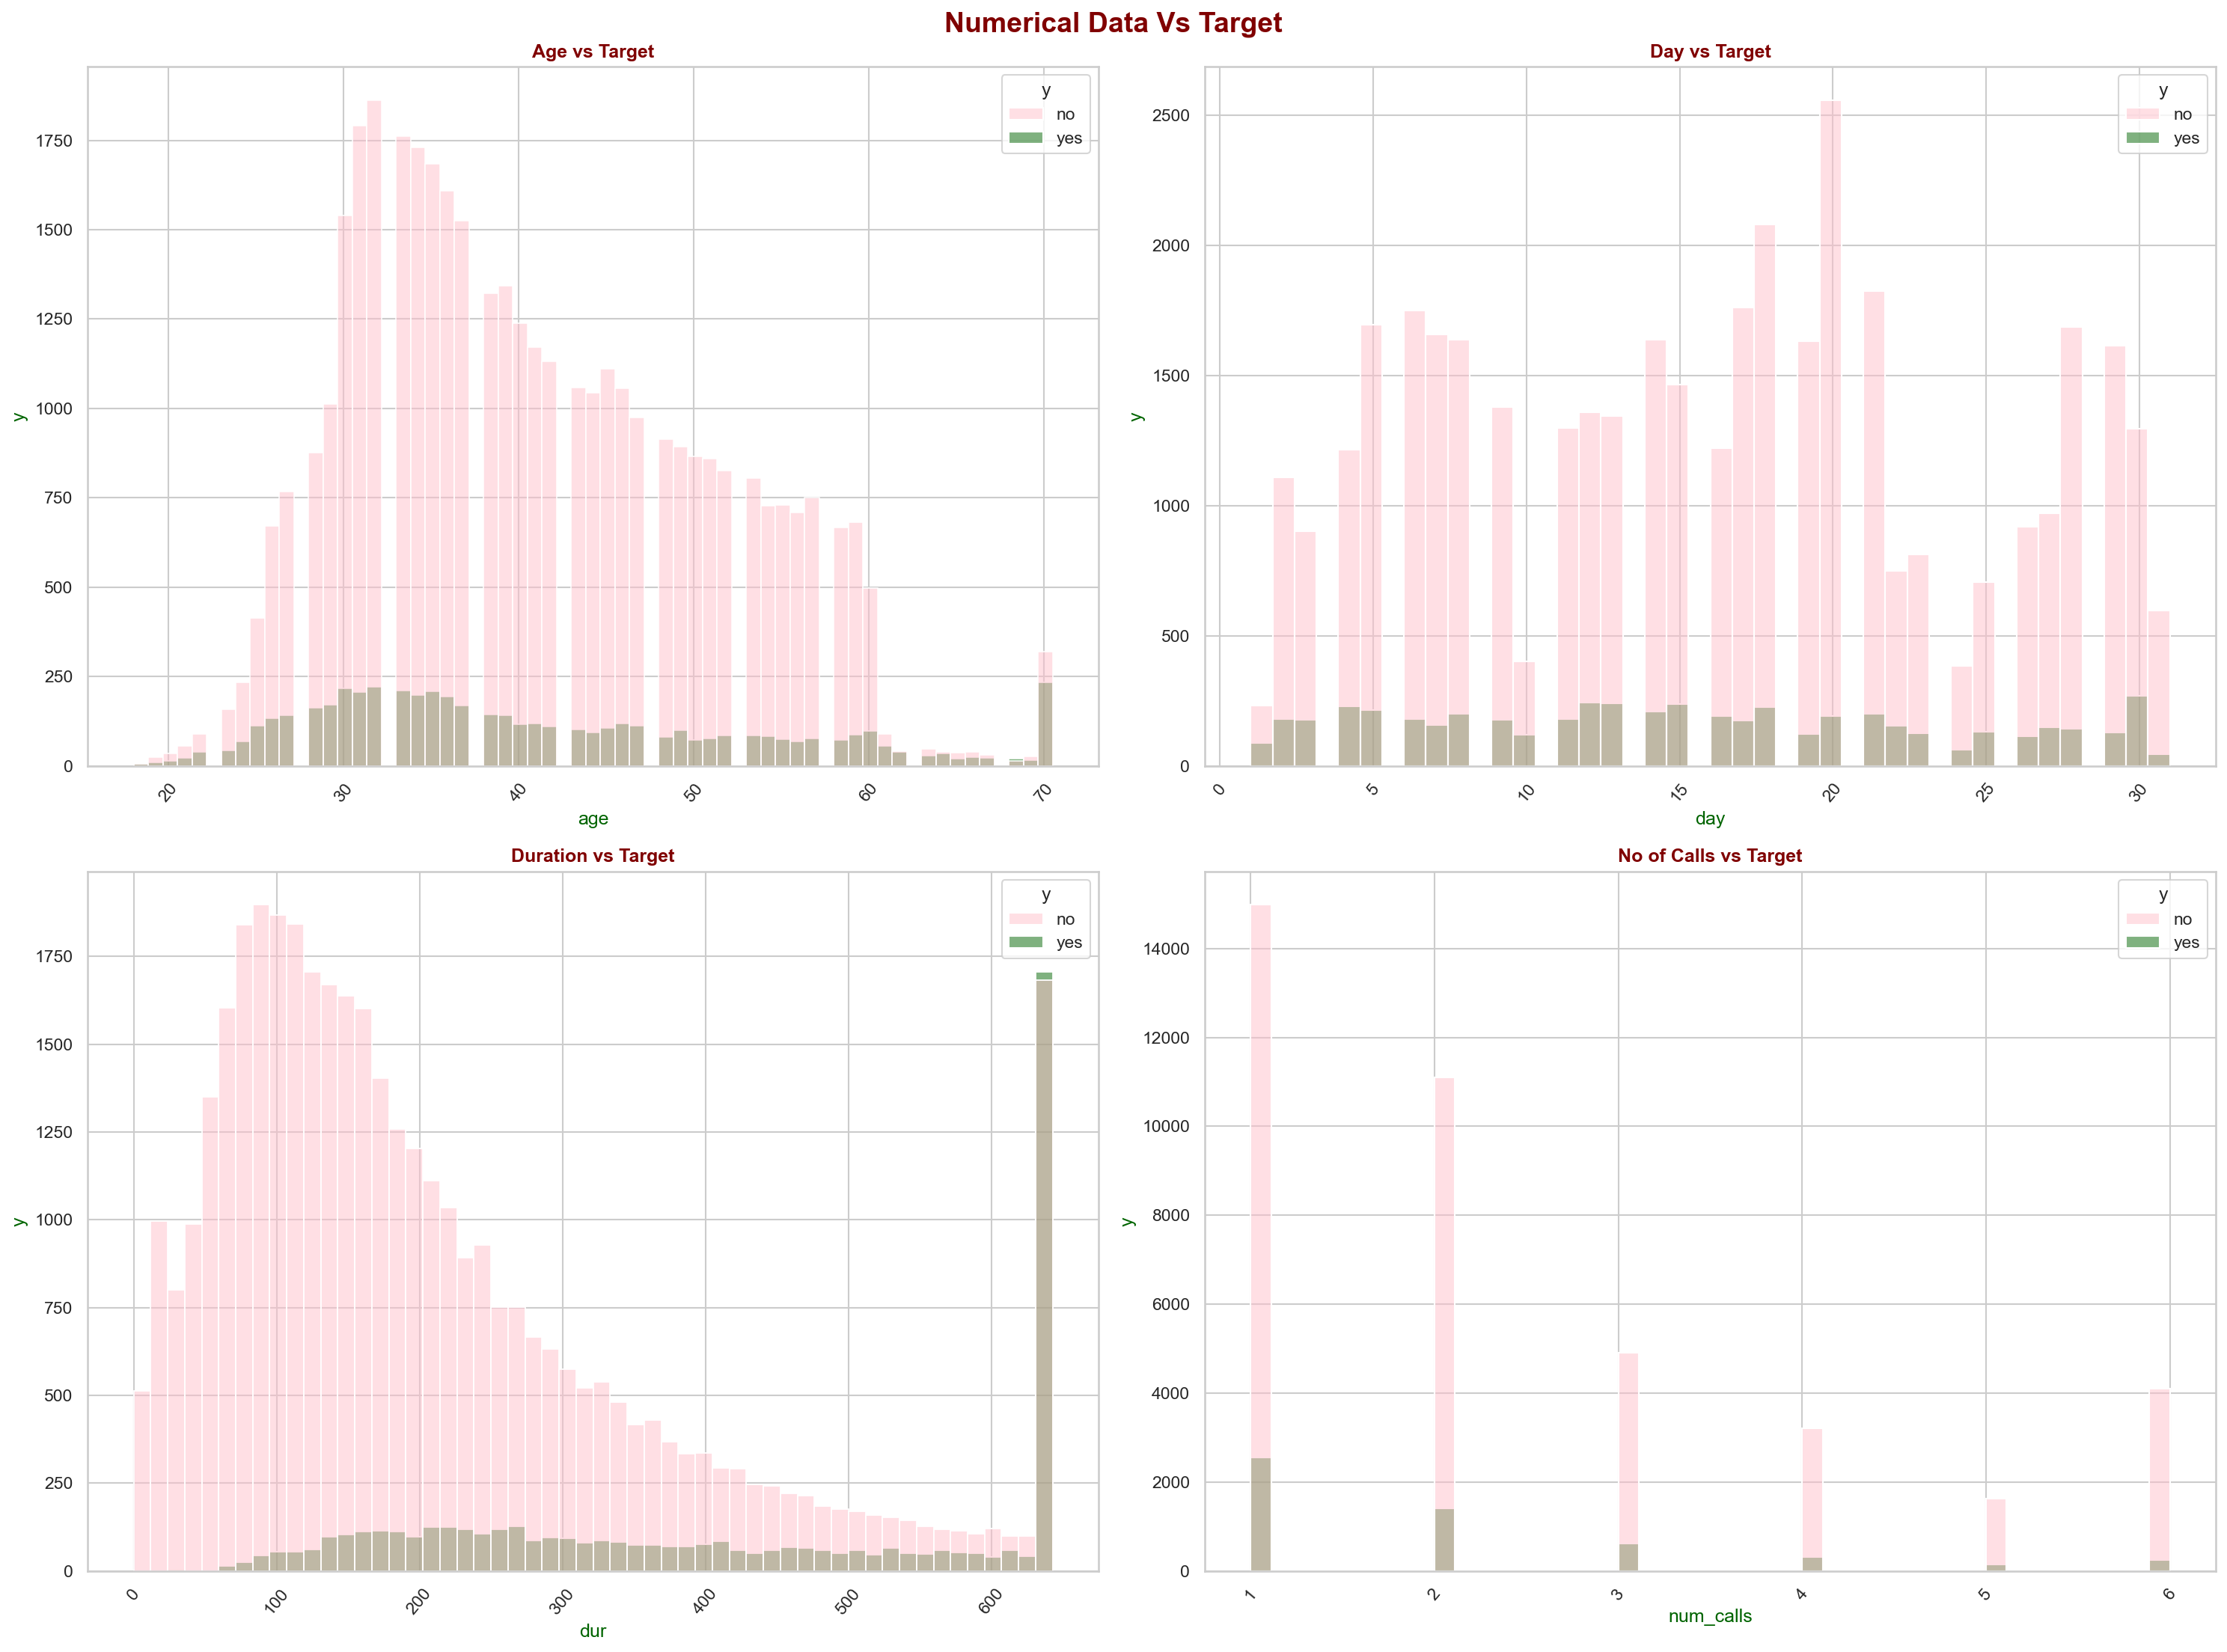

In [75]:
# Define the features and their titles
features = ['age', 'day', 'dur', 'num_calls']
titles = ['Age vs Target', 'Day vs Target', 'Duration vs Target', 'No of Calls vs Target']

plt.figure(figsize=(20, 15), dpi=150)
plt.suptitle("Numerical Data Vs Target", fontsize=18,  fontweight='bold', color='maroon')

# Loop through the features and create a subplot for each one
for i in range(len(features)):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=features[i], hue='y', data=df, palette=['pink', 'DarkGreen'])
    plt.xticks(rotation=50)
    plt.title(titles[i], fontweight='bold', color='maroon')
    plt.xlabel(features[i], color='DarkGreen')
    plt.ylabel('y', color='DarkGreen')

plt.tight_layout()
plt.show()


# Encoding...

In [76]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [77]:
df.mon = df.mon.map({'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9,'oct':10, 'nov':11, 'dec':12})


In [78]:
df.education_qual = df.education_qual.map({'tertiary':3, 'secondary':2, 'unknown':0, 'primary':1})


In [79]:
df.marital = df.marital.map({'married':2, 'single':1, 'divorced':0})

In [80]:
df.call_type = df.call_type.map({'unknown':0, 'cellular':1, 'telephone':2})

In [81]:
df.prev_outcome = df.prev_outcome.map({'unknown':2, 'failure':0, 'other':3, 'success':1})

In [82]:
from sklearn.preprocessing import LabelEncoder

Label_Encoder = LabelEncoder()
a = Label_Encoder.fit_transform(df.job)
print(a)
df.job = a
print(df.job.unique())


[4 9 2 ... 5 1 2]
[ 4  9  2  1 11  5  0  7  6 10  3  8]


In [83]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58.0,4,2,3,0,5,5,261.0,1.0,2,no,0
1,44.0,9,1,2,0,5,5,151.0,1.0,2,no,0
2,33.0,2,2,2,0,5,5,76.0,1.0,2,no,0
3,47.0,1,2,0,0,5,5,92.0,1.0,2,no,0
4,33.0,11,1,0,0,5,5,198.0,1.0,2,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,9,2,3,1,17,11,643.0,3.0,2,yes,1
45207,70.5,5,0,1,1,17,11,456.0,2.0,2,yes,1
45208,70.5,5,2,2,1,17,11,643.0,5.0,1,yes,1
45209,57.0,1,2,2,2,17,11,508.0,4.0,2,no,0


# Splitting

In [84]:
# X --> Feature y-- > Target

x = df[['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon', 'dur', 'num_calls', 'prev_outcome']].values
y = df['target'].values

In [85]:
# splitting the data as train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 48 )
     

In [86]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(36164, 10) (9041, 10) (36164,) (9041,)


### the data is imbalanced

# Balancing the data...

####  SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbors)

In [87]:
#Balancing the data
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='minority') 
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [88]:
print(len(x_train_smt))
print(len(y_train_smt))

53257
53257


now the data is balanced...

# Scaling...

In [89]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smt)
x_test_scaled = scaler.transform(x_test)

# Modelling

## logistic regression

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

LRmodel = LogisticRegression()
LRmodel.fit(x_train_scaled, y_train_smt)
LRy_pred = LRmodel.predict(x_test_scaled)
LRf1 = f1_score(y_test, LRy_pred)
print(f'F1 Score for Logistic Regression: {LRf1}')


F1 Score for Logistic Regression: 0.4156970111795574


In [91]:
LRy_pred_prob = LRmodel.predict_proba(x_test_scaled)[:, 1]
LRauroc = roc_auc_score(y_test, LRy_pred_prob)
print(f'AUROC Score for Logistic Regression: {LRauroc}')


AUROC Score for Logistic Regression: 0.8487101442447152


## KNN 

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, roc_auc_score

KNNmodel = KNeighborsClassifier(n_neighbors=3)
KNNmodel.fit(x_train_scaled, y_train_smt)
KNNy_pred = KNNmodel.predict(x_test_scaled)
KNNf1 = f1_score(y_test, KNNy_pred)
print(f'F1 Score for KNN: {KNNf1}')


F1 Score for KNN: 0.5305867665418227


In [93]:
KNNy_pred_prob = KNNmodel.predict_proba(x_test_scaled)[:, 1]
KNNauroc = roc_auc_score(y_test, KNNy_pred_prob)
print(f'AUROC Score for KNN: {KNNauroc}')


AUROC Score for KNN: 0.8455624703223936


## Decision tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score

DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_train_scaled, y_train_smt)
DTy_pred = DTmodel.predict(x_test_scaled)
DTf1 = f1_score(y_test, DTy_pred)
print(f'F1 Score for Decision Tree: {DTf1}')


F1 Score for Decision Tree: 0.5348112227225494


In [96]:
DTy_pred_prob = DTmodel.predict_proba(x_test_scaled)[:, 1]
DTauroc = roc_auc_score(y_test, DTy_pred_prob)
print(f'AUROC Score for Decision Tree: {DTauroc}')


AUROC Score for Decision Tree: 0.7899415547462922


## Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score

RFmodel = RandomForestClassifier()
RFmodel.fit(x_train_scaled, y_train_smt)
REy_pred = RFmodel.predict(x_test_scaled)
REf1 = f1_score(y_test, REy_pred)
print(f'F1 Score for Random Forest: {REf1}')


F1 Score for Random Forest: 0.5861313868613139


In [98]:
REy_pred_prob = RFmodel.predict_proba(x_test_scaled)[:, 1]
REauroc = roc_auc_score(y_test, REy_pred_prob)
print(f'AUROC Score for Random Forest: {REauroc}')


AUROC Score for Random Forest: 0.9145487594991437


## Gradient Boosting

In [107]:
from sklearn.ensemble import GradientBoostingClassifier
GBmodel = GradientBoostingClassifier()
GBmodel.fit(x_train_scaled, y_train_smt)
GBy_pred = GBmodel.predict(x_test_scaled)
GBf1 = f1_score(y_test, GBy_pred)
print(f'F1 Score for Gradient Boosting: {GBf1}')


F1 Score for Gradient Boosting: 0.5785639958376692


In [108]:
from sklearn.metrics import f1_score, roc_auc_score
GBmodel = GradientBoostingClassifier()
GBmodel.fit(x_train_scaled, y_train_smt)
GBy_pred = GBmodel.predict(x_test_scaled)
GBf1 = f1_score(y_test, GBy_pred)
print(f'F1 Score for Gradient Boosting: {GBf1}')


F1 Score for Gradient Boosting: 0.5785639958376692


In [109]:
GBy_pred_prob = GBmodel.predict_proba(x_test_scaled)[:, 1]
GBauroc = roc_auc_score(y_test, GBy_pred_prob)
print(f'AUROC Score for Gradient Boosting: {GBauroc}')


AUROC Score for Gradient Boosting: 0.907237097978135


## XGBoost

In [110]:
import xgboost as xgb
from sklearn.metrics import f1_score
XGBmodel = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGBmodel.fit(x_train_scaled, y_train_smt)
XGBy_pred = XGBmodel.predict(x_test_scaled)
XGBf1 = f1_score(y_test, XGBy_pred)
print(f'F1 Score for XGBoost: {XGBf1}')


F1 Score for XGBoost: 0.6031976744186047


In [111]:
from sklearn.metrics import f1_score, roc_auc_score

XGBmodel = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XGBmodel.fit(x_train_scaled, y_train_smt)
XGBy_pred = XGBmodel.predict(x_test_scaled)
XGBf1 = f1_score(y_test, XGBy_pred)
print(f'F1 Score for XGBoost: {XGBf1}')


F1 Score for XGBoost: 0.6031976744186047


In [112]:
XGBy_pred_prob = XGBmodel.predict_proba(x_test_scaled)[:, 1]
XGBauroc = roc_auc_score(y_test, XGBy_pred_prob)
print(f'AUROC Score for XGBoost: {XGBauroc}')


AUROC Score for XGBoost: 0.9204975029238793


## Cat Boost

In [114]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score

CBmodel = CatBoostClassifier(verbose=0)
CBmodel.fit(x_train_scaled, y_train_smt)
CBy_pred = CBmodel.predict(x_test_scaled)
CBf1 = f1_score(y_test, CBy_pred)
print(f'F1 Score for CatBoost: {CBf1}')


F1 Score for CatBoost: 0.6112128984976182


In [115]:
CBy_pred_prob = CBmodel.predict_proba(x_test_scaled)[:, 1]
CBauroc = roc_auc_score(y_test, CBy_pred_prob)
print(f'AUROC Score for CatBoost: {CBauroc}')


AUROC Score for CatBoost: 0.9247370125251047


In [117]:
print("F1 Scores of All Model :-")
print(f'F1 Score for Logistic Regression:       {LRf1}')
print(f'F1 Score for KNN:                       {KNNf1}')
print(f'F1 Score for Decision Tree:             {DTf1}')
print(f'F1 Score for Random Forest:             {REf1}')
print(f'F1 Score for Gradient Boosting:         {GBf1}')
print(f'F1 Score for XGBoost:                   {XGBf1}')
print(f'F1 Score for CatBoost:                  {CBf1}')

print("AUROC Scores of All Model :-")
print(f'AUROC Score for Logistic Regression:    {LRauroc}')
print(f'AUROC Score for KNN:                    {KNNauroc}')
print(f'AUROC Score for Decision Tree:          {DTauroc}')
print(f'AUROC Score for Random Forest:          {REauroc}')
print(f'AUROC Score for Gradient Boosting:      {GBauroc}')
print(f'AUROC Score for XGBoost:                {XGBauroc}')
print(f'AUROC Score for CatBoost:               {CBauroc}')


F1 Scores of All Model :-
F1 Score for Logistic Regression:       0.4156970111795574
F1 Score for KNN:                       0.5305867665418227
F1 Score for Decision Tree:             0.5348112227225494
F1 Score for Random Forest:             0.5861313868613139
F1 Score for Gradient Boosting:         0.5785639958376692
F1 Score for XGBoost:                   0.6031976744186047
F1 Score for CatBoost:                  0.6112128984976182
AUROC Scores of All Model :-
AUROC Score for Logistic Regression:    0.8487101442447152
AUROC Score for KNN:                    0.8455624703223936
AUROC Score for Decision Tree:          0.7899415547462922
AUROC Score for Random Forest:          0.9145487594991437
AUROC Score for Gradient Boosting:      0.907237097978135
AUROC Score for XGBoost:                0.9204975029238793
AUROC Score for CatBoost:               0.9247370125251047


# Based on the F1 score, the CAT_Boost model trained with the SMOTE-Tomek dataset is performing better.
## F1 Score for CATBOOST     :      0.611
## AUROC Score for CatBoost : 0.924

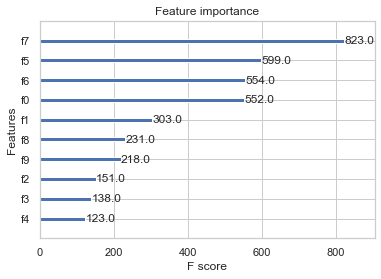

In [118]:
from xgboost import plot_importance
plot_importance(XGBmodel)
plt.show()

# conclusion:
#### Duration: The longer the call, the better the chances of influencing the clients.
#### Month: Customers are more likely to get insurance in May compared to other months.
#### Previous Outcome: The outcome of previous interactions plays a vital role as well. People who are already aware of the benefits of insurance can be approached more easily.
#### Call Type: The type of call is also a key factor.
#### Marital Status and Education Qualification: These factors do not significantly affect the process of influencing people.¶